In [1]:
# importing libraries
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/MiNi Project/datset_cosmetics.csv")

In [4]:
df.head()

,Product Name,Brand,Ingredients,Health Risk Numerical Data,Health Risk Level,Long-Term Health Effects,Skin Type Numerical Data,Skin Type,Age Group Numerical Data,Age Group,Price,Rupees,Rating,Usage Instructions
0,Foundation,Brand A,Water,204,Moderate,User friendly,1,Normal,104,Young Adult,$20,1700,4.5,Apply evenly on clean skin
1,Lipstick,Brand B,Red 7 Lake,204,Moderate,Dry Lips,1,Normal,101,Adult,$15,1275,3.8,Apply directly to lips
2,Mascara,Brand C,Carbon Black,201,High,Eye Irritation,2,Sensitive,101,Adult,$25,2125,2.0,Use with caution near eyes
3,Eyeliner,Brand D,Iron Oxides,204,Moderate,User friendly,3,Oily,104,Young Adult,$18,1530,4.2,Apply close to lash line
4,Moisturizer,Brand E,"Glycerin, Hyaluronic Acid",204,Moderate,Hydration,4,Dry,101,Adult,$30,2550,4.8,"Apply to clean, dry skin"


In [5]:
df

,Product Name,Brand,Ingredients,Health Risk Numerical Data,Health Risk Level,Long-Term Health Effects,Skin Type Numerical Data,Skin Type,Age Group Numerical Data,Age Group,Price,Rupees,Rating,Usage Instructions
0,Foundation,Brand A,Water,204,Moderate,User friendly,1,Normal,104,Young Adult,$20,1700,4.5,Apply evenly on clean skin
1,Lipstick,Brand B,Red 7 Lake,204,Moderate,Dry Lips,1,Normal,101,Adult,$15,1275,3.8,Apply directly to lips
2,Mascara,Brand C,Carbon Black,201,High,Eye Irritation,2,Sensitive,101,Adult,$25,2125,2.0,Use with caution near eyes
3,Eyeliner,Brand D,Iron Oxides,204,Moderate,User friendly,3,Oily,104,Young Adult,$18,1530,4.2,Apply close to lash line
4,Moisturizer,Brand E,"Glycerin, Hyaluronic Acid",204,Moderate,Hydration,4,Dry,101,Adult,$30,2550,4.8,"Apply to clean, dry skin"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,Neon Green Hair Color,Brand FFFFF,"Aqua, Ethanolamine, Propylene Glycol, Sodium L...",203,Medium,"Potential allergic reactions, scalp irritation",6,All,101,Adult,$40,3400,4.6,"Wear gloves. Apply color to roots, leave on fo..."
1001,Ash Blonde Hair Dye,Brand GGGGG,"Water, Ammonium Hydroxide, Propylene Glycol, C...",203,Medium,May cause scalp dryness,6,All,101,Adult,$41,3485,4.8,"Apply colorant to dry hair, leave on for recom..."
1002,Emerald Green Hair Color,Brand HHHHH,"Aqua, Ethanolamine, Propylene Glycol, Sodium L...",203,Medium,Potential scalp irritation,6,All,101,Adult,$42,3570,4.7,Perform a patch test before full application. ...
1003,Silver Grey Hair Dye,Brand IIIII,"Water, Ammonium Hydroxide, Propylene Glycol, C...",203,Medium,May cause scalp dryness,6,All,101,Adult,$43,3655,4.6,"Apply colorant to dry hair, leave on for recom..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Product Name                1005 non-null   object 
 1   Brand                       1005 non-null   object 
 2   Ingredients                 1005 non-null   object 
 3   Health Risk Numerical Data  1005 non-null   int64  
 4   Health Risk Level           1005 non-null   object 
 5   Long-Term Health Effects    1005 non-null   object 
 6   Skin Type Numerical Data    1005 non-null   int64  
 7   Skin Type                   1005 non-null   object 
 8   Age Group Numerical Data    1005 non-null   int64  
 9   Age Group                   1005 non-null   object 
 10  Price                       1005 non-null   object 
 11  Rupees                      1005 non-null   int64  
 12  Rating                      1005 non-null   float64
 13  Usage Instructions          1005 

In [7]:
df.isnull().sum()

,0
Product Name,0
Brand,0
Ingredients,0
Health Risk Numerical Data,0
Health Risk Level,0
Long-Term Health Effects,0
Skin Type Numerical Data,0
Skin Type,0
Age Group Numerical Data,0
Age Group,0


In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates()

,Product Name,Brand,Ingredients,Health Risk Numerical Data,Health Risk Level,Long-Term Health Effects,Skin Type Numerical Data,Skin Type,Age Group Numerical Data,Age Group,Price,Rupees,Rating,Usage Instructions
0,Foundation,Brand A,Water,204,Moderate,User friendly,1,Normal,104,Young Adult,$20,1700,4.5,Apply evenly on clean skin
1,Lipstick,Brand B,Red 7 Lake,204,Moderate,Dry Lips,1,Normal,101,Adult,$15,1275,3.8,Apply directly to lips
2,Mascara,Brand C,Carbon Black,201,High,Eye Irritation,2,Sensitive,101,Adult,$25,2125,2.0,Use with caution near eyes
3,Eyeliner,Brand D,Iron Oxides,204,Moderate,User friendly,3,Oily,104,Young Adult,$18,1530,4.2,Apply close to lash line
4,Moisturizer,Brand E,"Glycerin, Hyaluronic Acid",204,Moderate,Hydration,4,Dry,101,Adult,$30,2550,4.8,"Apply to clean, dry skin"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,Neon Green Hair Color,Brand FFFFF,"Aqua, Ethanolamine, Propylene Glycol, Sodium L...",203,Medium,"Potential allergic reactions, scalp irritation",6,All,101,Adult,$40,3400,4.6,"Wear gloves. Apply color to roots, leave on fo..."
1001,Ash Blonde Hair Dye,Brand GGGGG,"Water, Ammonium Hydroxide, Propylene Glycol, C...",203,Medium,May cause scalp dryness,6,All,101,Adult,$41,3485,4.8,"Apply colorant to dry hair, leave on for recom..."
1002,Emerald Green Hair Color,Brand HHHHH,"Aqua, Ethanolamine, Propylene Glycol, Sodium L...",203,Medium,Potential scalp irritation,6,All,101,Adult,$42,3570,4.7,Perform a patch test before full application. ...
1003,Silver Grey Hair Dye,Brand IIIII,"Water, Ammonium Hydroxide, Propylene Glycol, C...",203,Medium,May cause scalp dryness,6,All,101,Adult,$43,3655,4.6,"Apply colorant to dry hair, leave on for recom..."


In [10]:
df.describe()

,Health Risk Numerical Data,Skin Type Numerical Data,Age Group Numerical Data,Rupees,Rating
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,202.447761,8.595025,101.251741,5141.104478,4.653234
std,1.109766,6.666364,0.625893,5278.720401,0.170720
min,201.000000,1.000000,101.000000,425.000000,2.000000
25%,201.000000,6.000000,101.000000,1700.000000,4.600000
50%,202.000000,6.000000,101.000000,2975.000000,4.700000
75%,203.000000,9.000000,101.000000,6630.000000,4.800000
max,204.000000,28.000000,104.000000,30175.000000,4.900000


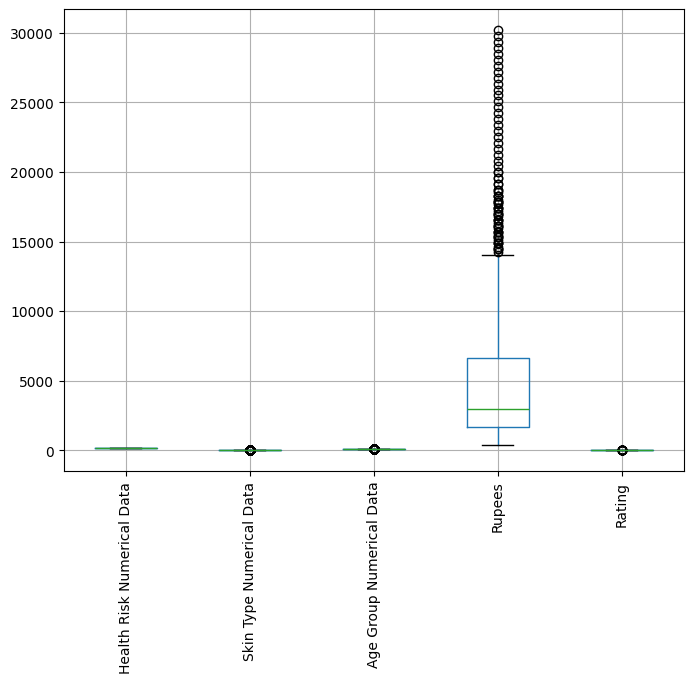

In [11]:
# Box plot
plt.figure(figsize=(8, 6))
df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [12]:
numerical_columns = df.select_dtypes(include=[np.number])

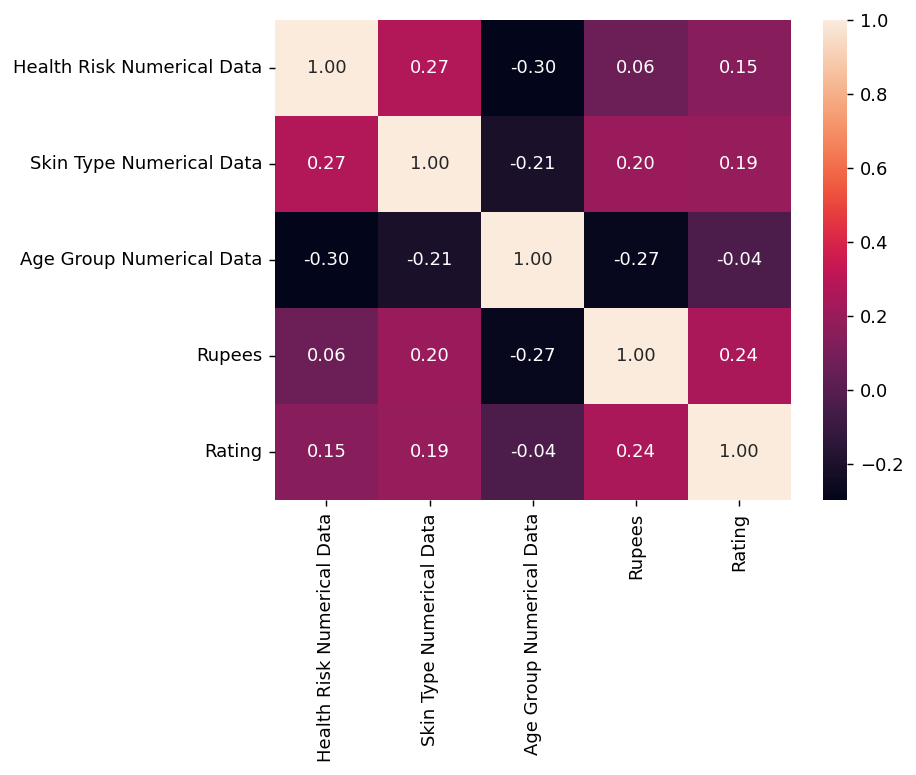

In [13]:
plt.figure(dpi=130)
sns.heatmap(numerical_columns.corr(),annot=True, fmt= '.2f')
plt.show()

logistics regression model training

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

Data Preparation

In [16]:
X = df[['Skin Type Numerical Data','Age Group Numerical Data','Rupees','Rating']]
Y = df['Health Risk Numerical Data']

Split the dataset into traning and testing sets

In [17]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


Train the model using logistic Regression

In [18]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
X_train

,Skin Type Numerical Data,Age Group Numerical Data,Rupees,Rating
828,2,101,7225,4.7
817,6,101,2550,4.7
655,27,101,12325,4.6
838,26,101,11050,4.7
466,15,101,3230,4.6
...,...,...,...,...
156,2,102,680,4.6
6,1,101,1870,3.9
329,12,101,1870,4.7
801,14,101,3570,4.8


In [20]:
Y_train

,Health Risk Numerical Data
828,202
817,202
655,202
838,202
466,203
...,...
156,201
6,204
329,204
801,202


In [21]:
X_test

,Skin Type Numerical Data,Age Group Numerical Data,Rupees,Rating
25,1,101,1275,4.7
978,6,101,1190,4.7
82,4,101,1700,4.4
303,6,101,2550,4.8
497,6,101,5100,4.8
...,...,...,...,...
128,2,102,1275,4.6
150,2,102,680,4.5
154,2,102,1020,4.5
38,6,101,425,4.5


In [22]:
Y_test

,Health Risk Numerical Data
25,201
978,203
82,201
303,204
497,203
...,...
128,201
150,201
154,201
38,201


Model Evaluation

In [23]:
model.predict(X_test)

array([201, 201, 201, 201, 202, 204, 202, 201, 202, 201, 204, 201, 202,
       203, 202, 202, 202, 204, 201, 202, 201, 201, 201, 204, 202, 203,
       202, 202, 202, 201, 201, 201, 201, 203, 203, 202, 204, 204, 204,
       201, 201, 201, 204, 202, 204, 203, 201, 203, 202, 201, 201, 203,
       204, 202, 204, 201, 202, 201, 203, 201, 204, 201, 202, 201, 201,
       202, 202, 201, 201, 201, 202, 204, 201, 204, 202, 203, 201, 202,
       201, 204, 202, 202, 201, 204, 201, 202, 201, 201, 201, 201, 204,
       201, 201, 202, 201, 202, 202, 203, 201, 202, 202, 201, 202, 202,
       202, 204, 201, 202, 204, 203, 204, 202, 201, 201, 202, 202, 201,
       201, 204, 201, 201, 202, 201, 201, 201, 202, 203, 203, 202, 201,
       201, 202, 201, 202, 202, 202, 202, 202, 201, 201, 202, 202, 201,
       201, 204, 201, 202, 201, 202, 202, 202, 203, 202, 202, 201, 201,
       201, 201, 202, 201, 202, 202, 202, 204, 201, 202, 201, 202, 201,
       201, 202, 201, 201, 202, 201, 201, 201, 204, 204, 201, 20

In [24]:
# Predict on the test set
Y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


Accuracy: 55.72%
Confusion Matrix:
 [[48  2  1  1]
 [ 9 43  6  6]
 [ 7 19  6  8]
 [25  4  1 15]]

Classification Report:
               precision    recall  f1-score   support

         201       0.54      0.92      0.68        52
         202       0.63      0.67      0.65        64
         203       0.43      0.15      0.22        40
         204       0.50      0.33      0.40        45

    accuracy                           0.56       201
   macro avg       0.53      0.52      0.49       201
weighted avg       0.54      0.56      0.52       201



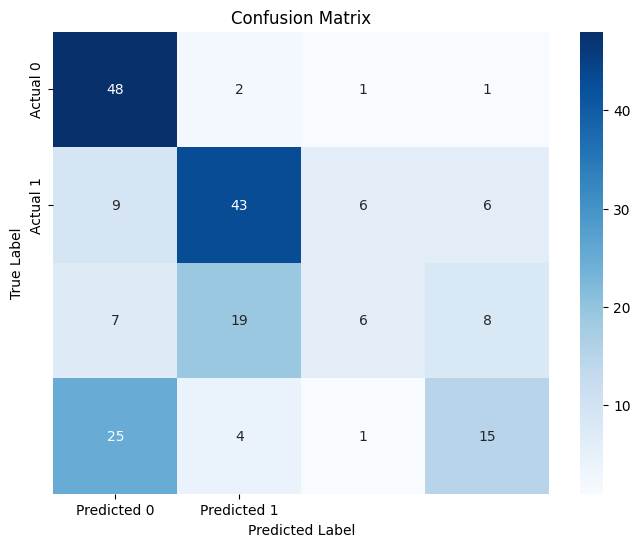

In [28]:
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [27]:

# Get user inputs
product_name = input("Enter Product Name: ")
skin_type = float(input("Enter Skin Type Numerical Data: "))
age_group = float(input("Enter Age Group Numerical Data: "))
rupees = float(input("Enter Rupees: "))
rating = float(input("Enter Rating: "))

# Create a DataFrame for the user input
user_input = pd.DataFrame([[skin_type, age_group, rupees, rating]], columns=['Skin Type Numerical Data', 'Age Group Numerical Data', 'Rupees', 'Rating'])

# Make a prediction
user_prediction = model.predict(user_input)
print(f"Product Name: {product_name}")
print(f"Predicted Health Risk Numerical Data: {user_prediction[0]}")

Enter Product Name: Lipstick
Enter Skin Type Numerical Data: 4
Enter Age Group Numerical Data: 101
Enter Rupees: 500
Enter Rating: 4.5
Product Name: Lipstick
Predicted Health Risk Numerical Data: 201
